In [ ]:
# Count vectors are used as features here.
# A count vector normally represents a matrix which contains the frequencies of tokens in documents.

In [1]:
# Import Libraries
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
%matplotlib inline
import matplotlib.pyplot as plt
import pandas, numpy as np, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [2]:
# load the dataset
train = pandas.read_csv('/Users/PrasadiA/Desktop/train.csv', encoding = "unicode_escape")
test = pandas.read_csv('/Users/PrasadiA/Desktop/tests.csv', encoding = "unicode_escape")
print(train)
print(test)

      Tweet index  Label                                         Tweet text
0               1      1  Sweet United Nations video. Just in time for C...
1               2      1  @mrdahl87 We are rumored to have talked to Erv...
2               3      1  Hey there! Nice to see you Minnesota/ND Winter...
3               4      0                3 episodes left I'm dying over here
4               5      1  I can't breathe! was chosen as the most notabl...
5               6      0  You're never too old for Footie Pajamas. http:...
6               7      1  Nothing makes me happier then getting on the h...
7               8      0  4:30 an opening my first beer now gonna be a l...
8               9      0  @Adam_Klug do you think you would support a gu...
9              10      0  @samcguigan544 You are not allowed to open tha...
10             11      1  Oh, thank GOD - our entire office email system...
11             12      0  But instead, I'm scrolling through Facebook, I...
12          

In [3]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['Tweet text'], train['Label'])

In [4]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train['Tweet text'])
count_vect.fit(test['Text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [5]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
xtest_count  =   count_vect.transform(test['Text'])

x_count_train = pandas.DataFrame(xtrain_count.toarray(), columns=count_vect.get_feature_names())
x_count_valid = pandas.DataFrame(xvalid_count.toarray(), columns=count_vect.get_feature_names())

In [6]:
x_count_train_df = x_count_train.copy()
x_count_valid_df = x_count_valid.copy()

word_count_train = pandas.DataFrame(x_count_train_df.apply(sum,axis = 0)).reset_index()
word_count_train.columns = ['col_names','count']
word_count_train = word_count_train.sort_values(['count'],ascending = [False])


word_count_valid = pandas.DataFrame(x_count_valid_df.apply(sum,axis = 0)).reset_index()
word_count_valid.columns = ['col_names','count']
word_count_valid = word_count_valid.sort_values(['count'],ascending = [False])

In [7]:
#dropping the zero count words
word_count_train = word_count_train[word_count_train['count'] > 500]

word_count_valid = word_count_valid[word_count_valid['count'] > 100]

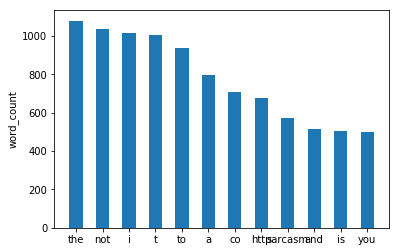

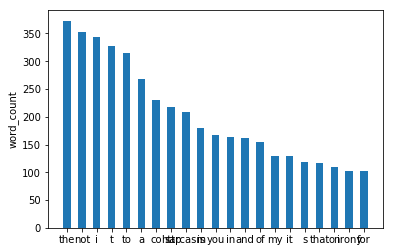

In [8]:
#Plots the word distribution
plt.bar(np.arange(len(word_count_train)),word_count_train['count'],0.5)
plt.xticks(np.arange(len(word_count_train)), word_count_train['col_names'])
plt.ylabel('word_count')
plt.show()

plt.bar(np.arange(len(word_count_valid)),word_count_valid['count'],0.5)
plt.xticks(np.arange(len(word_count_valid)), word_count_valid['col_names'])
plt.ylabel('word_count')
plt.show()

In [9]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, feature_vector_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    #predict the labels on tests data set
    predictions_test = classifier.predict(feature_vector_test)
    np.savetxt("prediction.csv", predictions_test, delimiter=",")
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [10]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.7455683003128258


In [11]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("LR, Count Vectors: ", accuracy)

LR, Count Vectors:  0.8717413972888426


c:\users\prasadia\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("SVM, Count Vectors: ", accuracy)

c:\users\prasadia\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM, Count Vectors:  0.4859228362877998


In [13]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("RF, Count Vectors: ", accuracy)

c:\users\prasadia\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.8279457768508863
